### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
data['car'].value_counts()
data['Bar'].value_counts()
data['CoffeeHouse'].value_counts()
data['CarryAway'].value_counts()
data['RestaurantLessThan20'].value_counts()
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

There Are 6 fields contain null records. 
Because of number of null values, I ignore the field Car, But for others the null records were droped.

In [9]:
null_col_list = ["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]
cleaned_data  = data.dropna(subset=null_col_list)

I need to convert the age field to a numerical field


In [10]:
cleaned_data['age'].value_counts()

age
21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: count, dtype: int64

In [11]:
cleaned_data.loc[:, 'age'] = cleaned_data['age'].str.replace("below21", "20")
cleaned_data.loc[:, 'age'] = cleaned_data['age'].str.replace("50plus", "51")
cleaned_data['age'].value_counts()



age
21    2537
26    2399
31    1925
51    1732
36    1253
41    1065
46     664
20     504
Name: count, dtype: int64

In [12]:
cleaned_data.loc[:, 'age'] = pd.to_numeric(cleaned_data['age'])


In [13]:
cleaned_data['age'].dtype

dtype('O')

4. What proportion of the total observations chose to accept the coupon? 



In [14]:
query_str_accept = "Y==1"
cleaned_data.query(query_str_accept).shape[0]/cleaned_data.shape[0]


0.5693352098683666

56.9% of observations accept the coupons.

5. Use a bar plot to visualize the `coupon` column.

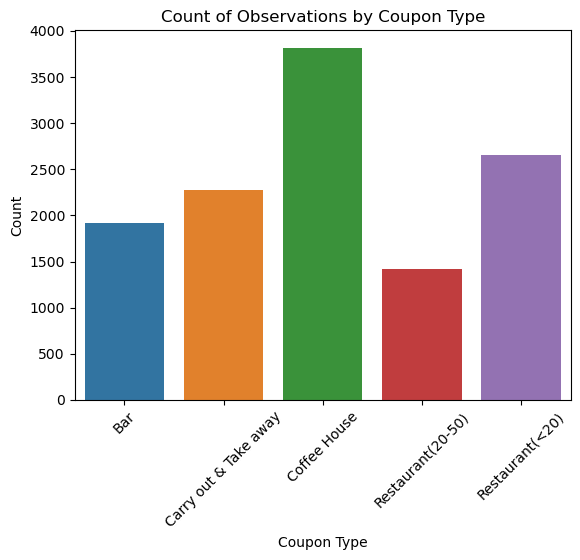

In [15]:
coupon_counts = cleaned_data.groupby('coupon').size().reset_index(name='count')

ax = sns.barplot(data=coupon_counts, x='coupon', y='count')
ax.set_title('Count of Observations by Coupon Type')
ax.set_xlabel('Coupon Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

/Users/adelfeyz/micromamba/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


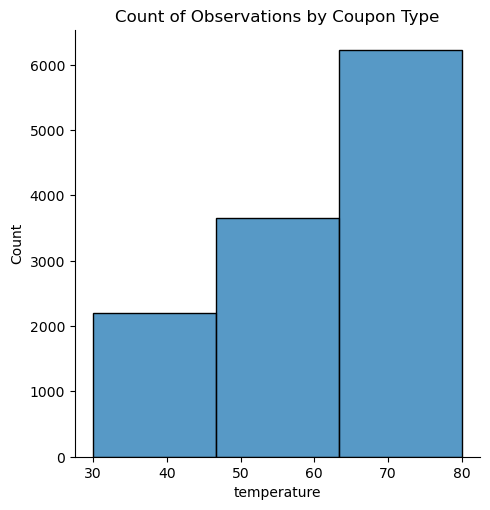

In [16]:
ax = sns.displot(data=cleaned_data, x='temperature', bins=3)

ax.set(title='Count of Observations by Coupon Type')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
bar_coupon = cleaned_data[cleaned_data['coupon']=="Bar"]

2. What proportion of bar coupons were accepted?


In [26]:
bar_coupon_accepted = bar_coupon[bar_coupon['Y'] == 1].shape[0]/bar_coupon.shape[0]
print(bar_coupon_accepted)


0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
bar_less_equal_3 = bar_coupon.query('(Y == 1) and (Bar in ["never", "less1", "1~3"])')
others_3_1 = bar_coupon.query(' (Bar in ["never", "less1", "1~3"])')
bar_more_3 = bar_coupon.query('(Y == 1) and (Bar in ["gt8", "4~8"])')
others_3_2 = bar_coupon.query('(Bar in ["gt8", "4~8"])')

acceptance_Group_3_1 = len(bar_less_equal_3) / len(others_3_1)

acceptance_Group_3_2 = len(bar_more_3) / len(others_3_2)

print("acceptance_Group_3_1 : ",acceptance_Group_3_1)

print("acceptance_Group_3_2 : ",acceptance_Group_3_2)

if (acceptance_Group_3_1) > (acceptance_Group_3_2):
    print("The coupons are accepted more by people who go less than or equal to 3 times a month to a bar: ")
elif (acceptance_Group_3_1) < (acceptance_Group_3_2):
    print("The coupons are accepted more by people who go greater than 3 times a month to a bar.")
else:
    print("The coupons are equally accepted by people who go less than or equal to 3 times a month and by those who go more than 3 times a month to a bar.")

acceptance_Group_3_1 :  0.37267441860465117
acceptance_Group_3_2 :  0.7616580310880829
The coupons are accepted more by people who go greater than 3 times a month to a bar.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
ans4_1 = bar_coupon.query('(Y == 1) and (Bar in ["gt8", "4~8", "1~3"]) and (age > 25)').shape[0]
ans4_2 = bar_coupon.query('(Bar in ["gt8", "4~8", "1~3"]) and (age > 25)').shape[0]
ans4_3 = bar_coupon.query('Y == 1').shape[0]
ans4_4 = bar_coupon.shape[0]
print(ans4_1/ans4_2)
print((ans4_3-ans4_1)/(ans4_4-ans4_2))

0.6898263027295285
0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [29]:
ans5_1 = bar_coupon.query('(Y == 1) and (Bar in ["gt8", "4~8", "1~3"]) and (passanger != "Kid(s)") and (occupation != "Farming Fishing & Forestry")').shape[0]
ans5_2 = bar_coupon.query('(Bar in ["gt8", "4~8", "1~3"]) and (passanger != "Kid(s)") and (occupation != "Farming Fishing & Forestry")').shape[0]
ans5_3 = bar_coupon.query('Y == 1').shape[0]
ans5_4 = bar_coupon.shape[0]
print("Acceptance rate of Group Q5:",ans5_1/ans5_2)
print("Acceptance rate of the others :",(ans5_3-ans5_1)/(ans5_4-ans5_2))

Acceptance rate of Group Q5: 0.7094339622641509
Acceptance rate of the others : 0.29790310918293567


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
bar_coupon['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [31]:
ans6_1 = bar_coupon.query('(Y == 1) and (Bar in ["gt8", "4~8", "1~3"]) and (passanger != "Kid(s)") and (maritalStatus != "widowed")').shape[0]
ans6_2 = bar_coupon.query('(Bar in ["gt8", "4~8", "1~3"]) and (passanger != "Kid(s)") and (maritalStatus != "widowed")').shape[0]

ans6_3 = bar_coupon.query('(Y == 1) and (Bar in ["gt8", "4~8", "1~3"]) and (age < 30)').shape[0]
ans6_4 = bar_coupon.query('(Bar in ["gt8", "4~8", "1~3"]) and (age < 30)').shape[0]

ans6_5 = bar_coupon.query('(Y == 1) and (RestaurantLessThan20 in ["gt8", "4~8"]) and (income in ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"])').shape[0]
ans6_6 = bar_coupon.query('(RestaurantLessThan20 in ["gt8", "4~8"]) and (income in ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"])').shape[0]

print("Acceptance rate of Group 1 Q6:",ans6_1/ans6_2)
print("Acceptance rate of Group 2 Q6:",ans6_3/ans6_4)
print("Acceptance rate of Group 3 Q6:",ans6_5/ans6_6)


Acceptance rate of Group 1 Q6: 0.7094339622641509
Acceptance rate of Group 2 Q6: 0.7195121951219512
Acceptance rate of Group 3 Q6: 0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations:

1. **General Acceptance Rate: 56%**
2. **Proportion of Bar Coupons Accepted: 41%**
3. **Acceptance Rate for People Who Go Less Than or Equal to 3 Times a Month to Bar: 37%**
4. **Acceptance Rate for People Who Go More Than 3 Times a Month to Bar: 76%**
5. **Acceptance Rate for Drivers Over the Age of 25 Who Go to a Bar More Than Once a Month: 68%**
6. **Acceptance Rate for Drivers Who Go to Bars More Than Once a Month, Had Passengers That Were Not Kids, and Had Occupations Other Than Farming, Fishing, or Forestry: 70%**
7. **Acceptance Rate for Drivers Who Go to Bars More Than Once a Month, Had Passengers That Were Not Kids, and Were Not Widowed: 70.9%**
8. **Acceptance Rate for Drivers Who Go to Bars More Than Once a Month and Are Under the Age of 30: 71.9%**
9. **Acceptance Rate for Drivers Who Go to Cheap Restaurants More Than 4 Times a Month and Have an Income Less Than 50K: 45.6%**

From these observations, we can hypothesize that drivers who accepted the bar coupons are more likely to be younger individuals who frequent bars more frequently, have passengers who are not children, and have occupations other than farming, fishing, or forestry. Additionally, they are less likely to be widowed and more likely to have lower incomes. Overall, the data suggests that younger individuals who have more social activities and lower financial resources are more inclined to accept bar coupons.

In [32]:
def acc_rate_con(df,query_str1):
    grp_size = df.query("Y == 1 and " + query_str1).shape[0]
    ttl_size = df.query(query_str1).shape[0]
    return grp_size/ttl_size

def acc_rate(df):
    grp_size = df.query('Y == 1').shape[0]
    ttl_size = df.shape[0]
    return grp_size/ttl_size

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
lux_rest = cleaned_data[cleaned_data['coupon'] == "Restaurant(20-50)"]

The overal acceptance rate for restaurant between 20 - 50 $: 44%

In [35]:
print(acc_rate(lux_rest))

0.44601270289343686


In [122]:
occ = lux_rest.groupby('occupation').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})
occ = occ.sort_values('acc_rate')
occ


/var/folders/3f/lc4jd68n66l59h52jtwhnzq00000gn/T/ipykernel_69733/4203572773.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  occ = lux_rest.groupby('occupation').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})


,occupation,acc_rate
8,Farming Fishing & Forestry,0.166667
12,Installation Maintenance & Repair,0.200000
20,Retired,0.250000
9,Food Preparation & Serving Related,0.343750
4,Community & Social Services,0.347826
24,Unemployed,0.352423
3,Business & Financial,0.369863
1,Arts Design Entertainment Sports & Media,0.377049
23,Transportation & Material Moving,0.391304
7,Education&Training&Library,0.414894


In [ ]:
occ_list = ['Healthcare Practitioners & Technical','Construction & Extraction','Office & Administrative Support','Healthcare Support','Production Occupations']
# creating a list of most occupation groups who has higher acceptance rate

Marital status has not a significant effect on acceptance rate.

In [115]:
inc = lux_rest.groupby('income').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})
inc = inc.sort_values('acc_rate')
inc

/var/folders/3f/lc4jd68n66l59h52jtwhnzq00000gn/T/ipykernel_69733/1179153916.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inc = lux_rest.groupby('income').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})


,income,acc_rate
8,Less than $12500,0.352459
5,$62500 - $74999,0.364583
1,$12500 - $24999,0.378238
7,$87500 - $99999,0.390000
3,$37500 - $49999,0.443878
6,$75000 - $87499,0.460784
4,$50000 - $62499,0.489691
0,$100000 or More,0.502488
2,$25000 - $37499,0.525822


People who have income in range of 25000 - 37500 $ are more eager to coupon of luxury restaurant.
But generally higher income affect on acceptance rate of luxury restaurant coupons.

In [62]:
inc_25_37_K = lux_rest[lux_rest['income'] == "$25000 - $37499"]

In [121]:
age = lux_rest.groupby('age').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate_age'})
age = age.sort_values('acc_rate_age')
age

/var/folders/3f/lc4jd68n66l59h52jtwhnzq00000gn/T/ipykernel_69733/1928728518.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age = lux_rest.groupby('age').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate_age'})


,age,acc_rate_age
7,51,0.353488
3,31,0.420354
1,21,0.429577
5,41,0.446154
0,20,0.448276
4,36,0.490323
6,46,0.506329
2,26,0.514815


In [106]:
res = lux_rest.groupby('Restaurant20To50').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})
res = res.sort_values('acc_rate')
res

/var/folders/3f/lc4jd68n66l59h52jtwhnzq00000gn/T/ipykernel_69733/4004756827.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = lux_rest.groupby('Restaurant20To50').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})


,Restaurant20To50,acc_rate
4,never,0.298643
3,less1,0.416079
0,1~3,0.528302
1,4~8,0.630952
2,gt8,0.687500


People who went more than 4 times in a month to luxury restaurants, have higher acceptance rate of luxury restaurant coupons.

In [107]:
res2 = lux_rest.groupby('RestaurantLessThan20').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})
res2 = res2.sort_values('acc_rate')
res2

/var/folders/3f/lc4jd68n66l59h52jtwhnzq00000gn/T/ipykernel_69733/3706628665.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res2 = pas_partner.groupby('RestaurantLessThan20').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})


,RestaurantLessThan20,acc_rate
4,never,0.000000
3,less1,0.538462
0,1~3,0.620690
1,4~8,0.632653
2,gt8,0.733333


Also people who went more than 4 times to economic resaurant, have higher acceptance rate of luxury restaurant coupons. But this group have averagely 16% lower acceptance rate than previous group.

In [109]:
temp = lux_rest.groupby('temperature').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})
temp = temp.sort_values('acc_rate')
temp

/var/folders/3f/lc4jd68n66l59h52jtwhnzq00000gn/T/ipykernel_69733/1663212768.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = lux_rest.groupby('temperature').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})


,temperature,acc_rate
0,30,0.351351
1,55,0.427350
2,80,0.484511


Warmer days have more chance of coupon acceptance by passangers.

In [80]:
pas = lux_rest.groupby('passanger').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})
pas = pas.sort_values('acc_rate')
pas

/var/folders/3f/lc4jd68n66l59h52jtwhnzq00000gn/T/ipykernel_69733/3362620287.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pas = lux_rest.groupby('passanger').apply(lambda x: acc_rate(x)).reset_index().rename(columns={0: 'acc_rate'})


,passanger,acc_rate
2,Kid(s),0.368750
0,Alone,0.428274
1,Friend(s),0.477987
3,Partner,0.625000


The "partner" passangers meaningfully have higher acceptance rate than others.

Based on the observations:

1. **General Acceptance Rate: 44%**
2. **Occupations with Higher Acceptance Rates: 'Healthcare Practitioners & Technical', 'Construction & Extraction', 'Office & Administrative Support', 'Healthcare Support', 'Production Occupations' (Acceptance Rate: 56% - 72%)**
3. **Higher Acceptance Rate for People with Income in Range of $25,000 - $37,500**
4. **Higher Income Affects Acceptance Rate of Luxury Restaurant Coupons**
5. **People Who Visit Luxury Restaurants More Than 4 Times a Month Have Higher Acceptance Rate of Luxury Restaurant Coupons**
6. **People Who Visit Economic Restaurants More Than 4 Times a Month Also Have Higher Acceptance Rate of Luxury Restaurant Coupons, But 16% Lower Than the Previous Group**
7. **Warmer Days Have Higher Chance of Coupon Acceptance by Passengers**
8. **Passengers Traveling as Partners (Two Partners Travel Together) Have 15% Higher Acceptance Rate Than Others**

From these observations, we can hypothesize that drivers who accepted the luxury restaurant coupons are likely to be individuals with occupations in healthcare, construction, office administration, healthcare support, or production occupations. They may also belong to the income range of $25,000 - $37,500, be frequent visitors of luxury restaurants, and possibly economic restaurants as well. They may be more inclined to accept coupons on warmer days, and if they are traveling with a partner, they are more likely to accept coupons. 

Overall, these drivers may have a higher disposable income, enjoy dining out frequently, and be influenced by weather conditions and social factors such as traveling with a partner.